### Ecuación de difusión:
$$\frac{\partial u}{\partial t} = \beta \frac{\partial ^2 u}{\partial x^2} + g$$
En general:\
$$\frac{\partial u}{\partial t} = \beta \nabla ^2 u + g$$

Vamos a resolver:\
$$\frac{\partial u(x,t)}{\partial t} = \beta \frac{\partial ^2 u(x,t)}{\partial x^2} + g(x,t)$$
con $x \in (0,L)$, $t \in (0, L)$  

Sujeta a las condiciones: 

$u(0,t) = s(t)$ 

$\frac{\partial}{\partial x} u(L, t) = 0$

$u(x,0) = I(x)$


## Test

Si $u(x,t) = (3t+2)(x-L)$ \
$g(x,t) = 3(x-L)$ \
$u_0 (t) = u(0,t) = -L (3t+2)$ \
$s(t) = -L(3t+2)$ \
$s^{\prime}(t) = -3L$ \
$I(x) = u(x,0) = 2(x-L)$ \
$u_{0} = s(0)$  \
$u_{i} = I(x_i) = 2(i-L) $


Resulta en el sistema de ecuaciones: \
$ \begin{aligned} \frac{d u_0}{dt} &= s^{\prime} (t) = -3L \\
 \frac{d u_{i}}{dt} &= \frac{\beta}{\Delta x^2} (u_{i+1}(t) - 2u_i(t) + u_{i-1}(t)) + g_i (t)   
 \\
 \frac{d u_N}{dt} &= \beta \frac{2u_{N-1}(t) + 2\gamma \Delta x - 2 u_{N}(t)}{\Delta x^2} + g_N(t)
 \end{aligned}$ \
 Que es de la forma $U^{\prime} = f(U,t)$

In [ ]:
# Resolver la PDE con RK4

import numpy as np

np.set_printoptions(precision=4)

def u_exact(x,t):
    return (3*t + 2)*(x-L)

def dudx(t):
    return (3*t + 2)

def s(t):
    return u_exact(0, t)

def dsdt(t):
    return 3*(-L)

def g(x, t):
    return 3*(x-L)

# Hay tantas ecuaciones u_i como puntos en la malla de X. 
# Pasamos el sistema de N+1 ecuaciones a un arreglo HRS donde cada entrada es una du_i dt

def rhs(u, t):
    N = len(u) - 1
    rhs = np.zeros(N+1) # Cada entrada es una ecuación del sistema: un escalar
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + g(x[i], t)
    rhs[N] = (beta/dx**2)*(2*u[N-1] + 2*dx*dudx(t) - 2*u[N]) + g(x[N], t)
    return rhs # Regresamos un array de escalares.

def diffusion_RK4():
    from RK4_system import ode_RK4
    global beta, dx, L, x  # needed in rhs
    L = 1.5
    beta = 0.5
    N = 4 # Malla de 5 puntos
    x = np.linspace(0, L, N+1)
    dx = x[1] - x[0]
    u = np.zeros(N+1) # Array para la solución del sistema

    U_0 = np.zeros(N+1) # Array para condiciones iniciales
    U_0[0] = s(0)
    U_0[1:] = u_exact(x[1:], 0)
    dt = 0.1
    # print(dt)
    T = 1.2

    u, t = ode_RK4(rhs, U_0, dt, T)
    
    print("u(x,t)    ", end="")
    for j in range(len(x)):
        print(f" x={x[j]} ", end="")
    print("")
    for i in range(int(round(T/dt)) + 1):
        print(f"u(x,{t[i]:1.1f}): {u[i]:} ")
        
    print("**************")
    
    print("time: ", t)
    
    print("u.shape[0]= ", u.shape[0])
        
diffusion_RK4()

Resolviendo un problema específico: 
con $\beta =  8.2 \times 10 ^{-5} \quad \text{m$^2$s$^{-1}$}$


stability limit: 0.9527439024390245
0.0
0.9527439024390244
1.9054878048780488
2.8582317073170733
3.8109756097560976
4.763719512195122
5.716463414634147
6.6692073170731705
7.621951219512195
8.574695121951219
9.527439024390244
10.480182926829269
11.432926829268293
12.385670731707318
13.338414634146341
14.291158536585366
15.24390243902439
16.196646341463413
17.149390243902438
18.102134146341463
19.054878048780488
20.007621951219512
20.960365853658537
21.913109756097562
22.865853658536587
23.81859756097561
24.771341463414636
25.724085365853657
26.676829268292682
27.629573170731707
28.58231707317073
29.535060975609756
30.48780487804878
31.440548780487806
32.39329268292683
33.34603658536585
34.298780487804876
35.2515243902439
36.204268292682926
37.15701219512195
38.109756097560975
39.0625
40.015243902439025
40.96798780487805
41.920731707317074
42.8734756097561
43.826219512195124
44.77896341463415
45.73170731707317
46.6844512195122
47.63719512195122
48.58993902439025
49.54268292682927
50.4954

435.4039634146342
436.3567073170732
437.3094512195122
438.2621951219512
439.2149390243903
440.1676829268293
441.1204268292683
442.0731707317073
443.0259146341464
443.9786585365854
444.9314024390244
445.8841463414634
446.8368902439025
447.7896341463415
448.7423780487805
449.6951219512195
450.6478658536585
451.6006097560976
452.5533536585366
453.5060975609756
454.4588414634146
455.4115853658537
456.3643292682927
457.3170731707317
458.2698170731707
459.2225609756098
460.1753048780488
461.1280487804878
462.0807926829268
463.0335365853659
463.9862804878049
464.9390243902439
465.8917682926829
466.844512195122
467.797256097561
468.75
469.702743902439
470.6554878048781
471.6082317073171
472.5609756097561
473.5137195121951
474.4664634146342
475.4192073170732
476.3719512195122
477.3246951219512
478.2774390243903
479.2301829268293
480.1829268292683
481.1356707317073
482.0884146341464
483.0411585365854
483.9939024390244
484.9466463414634
485.8993902439025
486.8521341463415
487.8048780487805
488.75

879.3826219512196
880.3353658536586
881.2881097560976
882.2408536585366
883.1935975609756
884.1463414634146
885.0990853658536
886.0518292682927
887.0045731707318
887.9573170731708
888.9100609756098
889.8628048780488
890.8155487804878
891.7682926829268
892.7210365853658
893.673780487805
894.626524390244
895.579268292683
896.532012195122
897.484756097561
898.4375
899.390243902439
900.342987804878
901.295731707317
902.2484756097562
903.2012195121952
904.1539634146342
905.1067073170732
906.0594512195122
907.0121951219512
907.9649390243902
908.9176829268292
909.8704268292684
910.8231707317074
911.7759146341464
912.7286585365854
913.6814024390244
914.6341463414634
915.5868902439024
916.5396341463414
917.4923780487806
918.4451219512196
919.3978658536586
920.3506097560976
921.3033536585366
922.2560975609756
923.2088414634146
924.1615853658536
925.1143292682927
926.0670731707318
927.0198170731708
927.9725609756098
928.9253048780488
929.8780487804878
930.8307926829268
931.7835365853658
932.73628

1311.9283536585367
1312.8810975609756
1313.8338414634147
1314.7865853658536
1315.7393292682927
1316.6920731707316
1317.6448170731708
1318.5975609756097
1319.5503048780488
1320.503048780488
1321.4557926829268
1322.408536585366
1323.3612804878048
1324.314024390244
1325.2667682926829
1326.219512195122
1327.172256097561
1328.125
1329.0777439024391
1330.030487804878
1330.9832317073171
1331.935975609756
1332.8887195121952
1333.841463414634
1334.7942073170732
1335.7469512195123
1336.6996951219512
1337.6524390243903
1338.6051829268292
1339.5579268292684
1340.5106707317073
1341.4634146341464
1342.4161585365853
1343.3689024390244
1344.3216463414635
1345.2743902439024
1346.2271341463415
1347.1798780487804
1348.1326219512196
1349.0853658536585
1350.0381097560976
1350.9908536585367
1351.9435975609756
1352.8963414634147
1353.8490853658536
1354.8018292682927
1355.7545731707316
1356.7073170731708
1357.6600609756097
1358.6128048780488
1359.565548780488
1360.5182926829268
1361.471036585366
1362.42378048

1734.9466463414635
1735.8993902439024
1736.8521341463415
1737.8048780487804
1738.7576219512196
1739.7103658536585
1740.6631097560976
1741.6158536585367
1742.5685975609756
1743.5213414634147
1744.4740853658536
1745.4268292682927
1746.3795731707316
1747.3323170731708
1748.2850609756097
1749.2378048780488
1750.190548780488
1751.1432926829268
1752.096036585366
1753.0487804878048
1754.001524390244
1754.9542682926829
1755.907012195122
1756.859756097561
1757.8125
1758.7652439024391
1759.717987804878
1760.6707317073171
1761.623475609756
1762.5762195121952
1763.528963414634
1764.4817073170732
1765.4344512195123
1766.3871951219512
1767.3399390243903
1768.2926829268292
1769.2454268292684
1770.1981707317073
1771.1509146341464
1772.1036585365855
1773.0564024390244
1774.0091463414635
1774.9618902439024
1775.9146341463415
1776.8673780487804
1777.8201219512196
1778.7728658536585
1779.7256097560976
1780.6783536585367
1781.6310975609756
1782.5838414634147
1783.5365853658536
1784.4893292682927
1785.44207

2159.870426829268
2160.8231707317073
2161.7759146341464
2162.7286585365855
2163.6814024390246
2164.6341463414633
2165.5868902439024
2166.5396341463415
2167.4923780487807
2168.4451219512193
2169.3978658536585
2170.3506097560976
2171.3033536585367
2172.256097560976
2173.2088414634145
2174.1615853658536
2175.1143292682927
2176.067073170732
2177.0198170731705
2177.9725609756097
2178.925304878049
2179.878048780488
2180.830792682927
2181.7835365853657
2182.736280487805
2183.689024390244
2184.641768292683
2185.594512195122
2186.547256097561
2187.5
2188.452743902439
2189.4054878048782
2190.358231707317
2191.310975609756
2192.263719512195
2193.2164634146343
2194.1692073170734
2195.121951219512
2196.074695121951
2197.0274390243903
2197.9801829268295
2198.932926829268
2199.8856707317073
2200.8384146341464
2201.7911585365855
2202.7439024390246
2203.6966463414633
2204.6493902439024
2205.6021341463415
2206.5548780487807
2207.5076219512193
2208.4603658536585
2209.4131097560976
2210.3658536585367
2211

2588.6051829268295
2589.557926829268
2590.5106707317073
2591.4634146341464
2592.4161585365855
2593.3689024390246
2594.3216463414633
2595.2743902439024
2596.2271341463415
2597.1798780487807
2598.1326219512193
2599.0853658536585
2600.0381097560976
2600.9908536585367
2601.943597560976
2602.8963414634145
2603.8490853658536
2604.8018292682927
2605.754573170732
2606.7073170731705
2607.6600609756097
2608.612804878049
2609.565548780488
2610.518292682927
2611.4710365853657
2612.423780487805
2613.376524390244
2614.329268292683
2615.282012195122
2616.234756097561
2617.1875
2618.140243902439
2619.0929878048782
2620.045731707317
2620.998475609756
2621.951219512195
2622.9039634146343
2623.8567073170734
2624.809451219512
2625.762195121951
2626.7149390243903
2627.6676829268295
2628.620426829268
2629.5731707317073
2630.5259146341464
2631.4786585365855
2632.4314024390246
2633.3841463414633
2634.3368902439024
2635.2896341463415
2636.2423780487807
2637.1951219512193
2638.1478658536585
2639.1006097560976
2

3014.4817073170734
3015.434451219512
3016.387195121951
3017.3399390243903
3018.2926829268295
3019.245426829268
3020.1981707317073
3021.1509146341464
3022.1036585365855
3023.0564024390246
3024.0091463414633
3024.9618902439024
3025.9146341463415
3026.8673780487807
3027.8201219512193
3028.7728658536585
3029.7256097560976
3030.6783536585367
3031.631097560976
3032.5838414634145
3033.5365853658536
3034.4893292682927
3035.442073170732
3036.394817073171
3037.3475609756097
3038.300304878049
3039.253048780488
3040.205792682927
3041.1585365853657
3042.111280487805
3043.064024390244
3044.016768292683
3044.969512195122
3045.922256097561
3046.875
3047.827743902439
3048.7804878048782
3049.733231707317
3050.685975609756
3051.638719512195
3052.5914634146343
3053.5442073170734
3054.496951219512
3055.449695121951
3056.4024390243903
3057.3551829268295
3058.307926829268
3059.2606707317073
3060.2134146341464
3061.1661585365855
3062.1189024390246
3063.0716463414633
3064.0243902439024
3064.9771341463415
3065.

3445.121951219512
3446.074695121951
3447.0274390243903
3447.9801829268295
3448.932926829268
3449.8856707317073
3450.8384146341464
3451.7911585365855
3452.7439024390246
3453.6966463414633
3454.6493902439024
3455.6021341463415
3456.5548780487807
3457.5076219512193
3458.4603658536585
3459.4131097560976
3460.3658536585367
3461.318597560976
3462.2713414634145
3463.2240853658536
3464.1768292682927
3465.129573170732
3466.082317073171
3467.0350609756097
3467.987804878049
3468.940548780488
3469.893292682927
3470.8460365853657
3471.798780487805
3472.751524390244
3473.704268292683
3474.657012195122
3475.609756097561
3476.5625
3477.515243902439
3478.4679878048782
3479.420731707317
3480.373475609756
3481.326219512195
3482.2789634146343
3483.2317073170734
3484.184451219512
3485.137195121951
3486.0899390243903
3487.0426829268295
3487.995426829268
3488.9481707317073
3489.9009146341464
3490.8536585365855
3491.8064024390246
3492.7591463414633
3493.7118902439024
3494.6646341463415
3495.6173780487807
3496

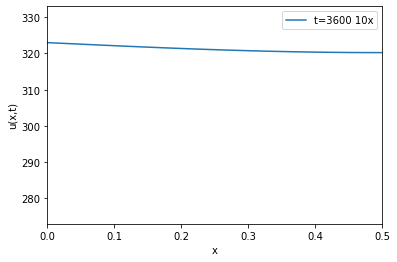

In [1]:
"""Temperature evolution in a rod, computed by a ForwardEuler method."""

import numpy as np

def rhs(u, t):
    """
    Esta función contiene la información del sistema de ODEs resultante de la PDE 
    difusión.
    """
    
    N = len(u) - 1
    rhs = np.zeros(N+1)
    rhs[0] = dsdt(t)
    for i in range(1, N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1]) + g(x[i], t)
    i = N
    rhs[i] = (beta/dx**2)*(2*u[i-1] + 2*dx*dudx(t) - 2*u[i]) + g(x[N], t)
    return rhs

def dudx(t):
    return 0

def s(t):
    return 323

def dsdt(t):
    return 0

def g(x, t):
    return 0


L = 0.5
beta = 8.2E-5
N = 40 # Malla de 41 puntos en x
x = np.linspace(0, L, N+1)
dx = x[1] - x[0]
u = np.zeros(N+1) # Array para la solución del sistema rhs

U_0 = np.zeros(N+1) # Array para condiciones iniciales
U_0[0] = s(0)
U_0[1:] = 283
dt = dx**2/(2*beta)
print('stability limit:', dt)
#dt = 0.00034375

# Resolvemos el sistema usando Forward Euler
from ode_system_FE import ode_FE
u, t = ode_FE(rhs, U_0, dt, T=1*60*60) # Resolvemos para 1 hr

# Make movie
import os
os.system('rm tmp_*.png') # Execute the command (a string) in a subshell.
import matplotlib.pyplot as plt
plt.ion() # Turn the Interactive mode ON.
y = u[0,:] # Valores de x para t = 0
lines = plt.plot(x, y) # Graficamos (x,solx) para t = 0 
plt.axis([x[0], x[-1], 273, s(0)+10])
plt.xlabel('x')
plt.ylabel('u(x,t)')
counter = 0
# Plot each of the first 100 frames, then increase speed by 10x
change_speed = 100
for i in range(0, u.shape[0]): # Iteramos sobre el número de divisions en el tiempo
    print(t[i])
    plot = True if i <= change_speed else i % 10 == 0
    lines[0].set_ydata(u[i,:])
    if i > change_speed:
        plt.legend(['t={:.0f} 10x'.format(t[i])])
    else:
        plt.legend(['t={:.0f}'.format(t[i])])
    plt.draw()
    if plot:
        plt.savefig('tmp_{:04d}.png'.format(counter))
        counter += 1
    #time.sleep(0.2)

In [3]:
# Para crear el archivo de video es necesario instalar ffmpeg

! ffmpeg -i tmp_%04d.png -r 4 -vcodec flv movie.flv

/bin/bash: ffmpeg: command not found
